# 1. Import dataset and split into Attributes and Target

In [1]:
#Lib
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# Load the input dataset
df = pd.read_csv('dataset_best_2862_3000.csv')
df.head(10)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC,Cost_[E/MWh],Congestion_[h],PeakLoad_[MW],MaxCurtailment_[MW],...,CurtailmentToRESGeneration_[%],TotalGeneration_[TWh],ShareResGeneration_[%],MaxLoadSheddingShare_[%],CF_gas,CF_nuc,CF_wat,CF_win,CF_sun,GAMS_error
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652,95.002971,342232.0,440929.412497,0.265669,...,17.570580,2988.845784,0.000048,0.0,0.203240,0.689348,0.247897,0.177179,0.129331,1
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749,706.110944,367563.0,440929.412497,0.389225,...,26.808339,2999.698390,0.000055,0.0,0.454996,0.825949,0.244089,0.157520,0.128098,0
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452,90.062284,372673.0,440929.412497,0.412014,...,28.569677,3089.038330,0.000066,0.0,0.113644,0.639707,0.245816,0.145467,0.112630,1
3,1.168674,0.513135,0.672458,0.131425,0.056598,0.109961,92.624826,356327.0,440929.412497,0.054575,...,2.635613,2909.707990,0.000021,0.0,0.195025,0.840115,0.242933,0.232125,0.132789,0
4,0.780587,0.558311,2.895860,0.391405,0.183363,0.288071,95.007263,330987.0,440929.412497,0.307098,...,16.582476,3060.614655,0.000052,0.0,0.201166,0.795364,0.257988,0.181468,0.129279,1
5,0.568655,0.622806,2.208519,0.171678,0.212573,0.082090,521.839272,378544.0,440929.412497,0.161052,...,4.773577,3068.697142,0.000037,0.0,0.512149,0.953839,0.250370,0.221810,0.131097,0
6,1.098779,0.308377,1.418885,0.118913,0.256489,0.006151,88.818971,408904.0,440929.412497,0.248101,...,10.901041,3077.622804,0.000037,0.0,0.145490,0.592008,0.232589,0.213308,0.120157,0
7,1.276510,0.271858,2.517624,0.012513,0.185300,0.725843,84.149104,258290.0,440929.412497,0.010813,...,0.007914,2980.014736,0.000023,0.0,0.033354,0.886180,0.258284,0.244838,0.134437,1
8,0.740493,0.813414,1.305634,0.400257,0.244999,0.101254,97.173299,369413.0,440929.412497,0.347698,...,22.370092,3076.435974,0.000058,0.0,0.322633,0.915669,0.243088,0.160626,0.121624,0
9,1.051327,0.673208,2.430025,0.397162,0.165809,0.538571,91.493834,283032.0,440929.412497,0.276499,...,12.355590,3040.427547,0.000051,0.0,0.096260,0.841697,0.259230,0.198282,0.131534,1


In [2]:
df.columns

Index(['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV',
       'rNTC', 'Cost_[E/MWh]', 'Congestion_[h]', 'PeakLoad_[MW]',
       'MaxCurtailment_[MW]', 'MaxLoadShedding_[MW]', 'Demand_[TWh]',
       'NetImports_[TWh]', 'Curtailment_[TWh]', 'Shedding_[MWh]',
       'LostLoad_[TWh]', 'MaxRESGeneration_[TWh]',
       'CurtailmentToRESGeneration_[%]', 'TotalGeneration_[TWh]',
       'ShareResGeneration_[%]', 'MaxLoadSheddingShare_[%]', 'CF_gas',
       'CF_nuc', 'CF_wat', 'CF_win', 'CF_sun', 'GAMS_error'],
      dtype='object')

In [3]:
count_zero_shedding = df[df['Shedding_[MWh]'] == 0].shape[0]

print(f"Nombre de lignes avec 'Shedding_[MWh]' égal à 0 : {count_zero_shedding}")

Nombre de lignes avec 'Shedding_[MWh]' égal à 0 : 2288


In [4]:
2288/2861

0.7997203774903879

In [5]:
df.shape

(2861, 27)

In [6]:
df_filtered = df[df['GAMS_error'] != 2]
df_filtered.shape

(2655, 27)

In [7]:
# Atributes X (features); labels y (target)

Dataset = df_filtered[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC','Curtailment_[TWh]', 'Shedding_[MWh]', 'Demand_[TWh]']]
#y_curtail = Dataset['Curtailment_[TWh]']
y_shed = (100*Dataset['Shedding_[MWh]']/1e6/ Dataset['Demand_[TWh]'])
X = Dataset[['CapacityRatio', 'ShareFlex', 'ShareStorage', 'ShareWind', 'SharePV','rNTC']]
y_shed

0       0.000000
1       0.876669
2       0.000000
3       0.000000
4       0.000000
          ...   
2855    0.000000
2856    0.000000
2857    0.000000
2858    0.000000
2859    0.000000
Length: 2655, dtype: float64

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


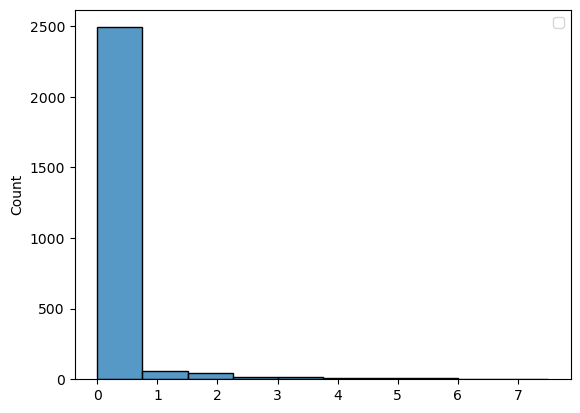

In [9]:
import seaborn as sns
sns.histplot(y_shed ,bins=10)
plt.legend( loc='best', bbox_to_anchor=((1,1)))

In [10]:
# Check for missing data in the target
nan_values = Dataset.isnull().values.any()
if nan_values:
    print("There are NaN values in the input data.")
else:
    print("There are no NaN values in the input data.")

There are no NaN values in the input data.


In [11]:
# Correlations
correlation_matrix = Dataset.corr()
Corr_curtail = correlation_matrix['Curtailment_[TWh]']
print(Corr_curtail)

CapacityRatio       -0.088117
ShareFlex           -0.057562
ShareStorage        -0.069412
ShareWind            0.821606
SharePV              0.285197
rNTC                -0.257180
Curtailment_[TWh]    1.000000
Shedding_[MWh]       0.132845
Demand_[TWh]              NaN
Name: Curtailment_[TWh], dtype: float64


In [12]:
Corr_shed = correlation_matrix['Shedding_[MWh]']
print(Corr_shed)

CapacityRatio       -0.402016
ShareFlex           -0.017249
ShareStorage        -0.042498
ShareWind            0.140299
SharePV             -0.061406
rNTC                -0.204496
Curtailment_[TWh]    0.132845
Shedding_[MWh]       1.000000
Demand_[TWh]              NaN
Name: Shedding_[MWh], dtype: float64


# 2. SPLIT & SCALE- Target : LS

In [13]:
print(X.shape)
print(y_shed.shape)
print(type(X))
print(type(y_shed))

(2655, 6)
(2655,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [14]:
X.head(3)

,CapacityRatio,ShareFlex,ShareStorage,ShareWind,SharePV,rNTC
0,0.753781,0.271553,0.875848,0.355617,0.160679,0.183652
1,0.578742,0.493152,2.755397,0.494740,0.113994,0.118749
2,1.267669,0.753980,2.758605,0.456891,0.281779,0.130452


In [15]:
from sklearn.model_selection import train_test_split
# 50% TRAIN 20% VAL 30% TEST
X_train, X_test, y_train, y_test = train_test_split(X, y_shed, test_size=0.3,random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.28, random_state=42)

print("Taille de l'ensemble d'entraînement :", len(X_train))
#print("Taille de l'ensemble de validation   :", len(X_val))
print("Taille de l'ensemble de test         :", len(X_test))

Taille de l'ensemble d'entraînement : 1858
Taille de l'ensemble de test         : 797


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_sc = scaler_X.fit_transform(X_train)
X_test_sc = scaler_X.transform(X_test)
#X_val_sc = scaler_X.transform(X_val)


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
#y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [18]:
type(y_train_scaled)
print(y_train_scaled)

[0. 0. 0. ... 0. 0. 0.]


# 3. Model Building - Load Shedding (Basic)

In [19]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

num_folds = 10
error_metrics = {'neg_mean_absolute_error','neg_root_mean_squared_error'}
models = {('MLP', MLPRegressor()),('RFR', RandomForestRegressor())}
my_cv = KFold(n_splits=10, shuffle=True, random_state=42)
scoring='neg_root_mean_squared_error'

In [20]:
# RFR : 
"""
modelo = RandomForestRegressor(random_state=42)

params = {
    # Number of trees in random forest
    'n_estimators': [50, 200, 500],  # default=100
     # Maximum number of levels in tree
    'max_depth': [None, 5,10],  #deafult = None
     # The minimum number of samples required to split an internal node
    'min_samples_split': [2, 5],
    # The minimum number of samples required to be at a leaf node
    'min_samples_leaf' : [1, 2, 4],
    # The number of features to consider when looking for the best split
    'max_features' : [None, "sqrt", "log2"],
    # Whether bootstrap samples are used when building trees
    'bootstrap' : [True, False]
}


# Search for the best combination of hyperparameters
grid_search_rf = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv, n_jobs=-1)
grid_search_rf.fit(X_train_sc, y_train_scaled)

best_rf = grid_search_rf.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_rf.best_score_, grid_search_rf.best_params_))
means = grid_search_rf.cv_results_['mean_test_score']
meansRF = means
stds = grid_search_rf.cv_results_['std_test_score']
params = grid_search_rf.cv_results_['params']
"""

'\nmodelo = RandomForestRegressor(random_state=42)\n\nparams = {\n    # Number of trees in random forest\n    \'n_estimators\': [50, 200, 500],  # default=100\n     # Maximum number of levels in tree\n    \'max_depth\': [None, 5,10],  #deafult = None\n     # The minimum number of samples required to split an internal node\n    \'min_samples_split\': [2, 5],\n    # The minimum number of samples required to be at a leaf node\n    \'min_samples_leaf\' : [1, 2, 4],\n    # The number of features to consider when looking for the best split\n    \'max_features\' : [None, "sqrt", "log2"],\n    # Whether bootstrap samples are used when building trees\n    \'bootstrap\' : [True, False]\n}\n\n\n# Search for the best combination of hyperparameters\ngrid_search_rf = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv, n_jobs=-1)\ngrid_search_rf.fit(X_train_sc, y_train_scaled)\n\nbest_rf = grid_search_rf.best_estimator_\n\n# Print best Result\nprint("Best result: %f using the

In [21]:
%%time

modelo = RandomForestRegressor(random_state=42)
scoring='neg_mean_absolute_error'
params = {
    # Number of trees in random forest
    'n_estimators': [50],  # default=100
     # Maximum number of levels in tree
    'max_depth': [10],  #deafult = None
     # The minimum number of samples required to split an internal node
    'min_samples_split': [2],
    # The minimum number of samples required to be at a leaf node
    'min_samples_leaf' : [2],
    # The number of features to consider when looking for the best split
    'max_features' : [None],
    # Whether bootstrap samples are used when building trees
    'bootstrap' : [True]
}


# Search for the best combination of hyperparameters
grid_search_rf = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv, n_jobs=-1)

start_time = time.time()

grid_search_rf.fit(X_train_sc, y_train_scaled)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

best_rf = grid_search_rf.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_rf.best_score_, grid_search_rf.best_params_))
means = grid_search_rf.cv_results_['mean_test_score']
stds = grid_search_rf.cv_results_['std_test_score']
params = grid_search_rf.cv_results_['params']

Temps d'exécution : 6.2485 secondes
Best result: -0.007199 using the following hyperparameters {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
CPU times: total: 719 ms
Wall time: 6.25 s


In [22]:
# MLP : 
"""
modelo = MLPRegressor(random_state=42)

param_grid_mlp = {
    'hidden_layer_sizes': [(128, 64, 32, 16), (100,50), (100,), (100, 50, 25)],            #[(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Search for the best combination of hyperparameters
grid_search_mlp = GridSearchCV(estimator=modelo, param_grid=param_grid_mlp, scoring=scoring, cv=my_cv, n_jobs=-1)
grid_search_mlp.fit(X_train_sc, y_train_scaled)

best_mlp = grid_search_mlp.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_mlp.best_score_, grid_search_mlp.best_params_))
means = grid_search_mlp.cv_results_['mean_test_score']
stds = grid_search_mlp.cv_results_['std_test_score']
params = grid_search_mlp.cv_results_['params']
"""

'\nmodelo = MLPRegressor(random_state=42)\n\nparam_grid_mlp = {\n    \'hidden_layer_sizes\': [(128, 64, 32, 16), (100,50), (100,), (100, 50, 25)],            #[(50,), (100,), (50, 50), (100, 50)],\n    \'activation\': [\'tanh\', \'relu\'],\n    \'solver\': [\'adam\', \'sgd\'],\n    \'alpha\': [0.0001, 0.001, 0.01],\n    \'learning_rate\': [\'constant\', \'adaptive\']\n}\n\n# Search for the best combination of hyperparameters\ngrid_search_mlp = GridSearchCV(estimator=modelo, param_grid=param_grid_mlp, scoring=scoring, cv=my_cv, n_jobs=-1)\ngrid_search_mlp.fit(X_train_sc, y_train_scaled)\n\nbest_mlp = grid_search_mlp.best_estimator_\n\n# Print best Result\nprint("Best result: %f using the following hyperparameters %s" % (grid_search_mlp.best_score_, grid_search_mlp.best_params_))\nmeans = grid_search_mlp.cv_results_[\'mean_test_score\']\nstds = grid_search_mlp.cv_results_[\'std_test_score\']\nparams = grid_search_mlp.cv_results_[\'params\']\n'

In [23]:
%%time

modelo = MLPRegressor(random_state=42)
#scoring='mean_absolute_error'
param_grid_mlp = {
    'hidden_layer_sizes': [(200,100,100,50)],           
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant']
}

# Search for the best combination of hyperparameters
grid_search_mlp = GridSearchCV(estimator=modelo, param_grid=param_grid_mlp, scoring=scoring, cv=my_cv, n_jobs=-1)

start_time = time.time()

grid_search_mlp.fit(X_train_sc, y_train_scaled)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

best_mlp = grid_search_mlp.best_estimator_

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (grid_search_mlp.best_score_, grid_search_mlp.best_params_))
means = grid_search_mlp.cv_results_['mean_test_score']
stds = grid_search_mlp.cv_results_['std_test_score']
params = grid_search_mlp.cv_results_['params']

Temps d'exécution : 6.7021 secondes
Best result: -0.007270 using the following hyperparameters {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
CPU times: total: 3.38 s
Wall time: 6.7 s


Evaluation metric:  neg_mean_absolute_error
Model  RandomForest
Model  MLPRegressor
[('RandomForest', -0.0071992609377772646, 0.0014351097977773721), ('MLPRegressor', -0.007234154182667642, 0.002039632282152118)]


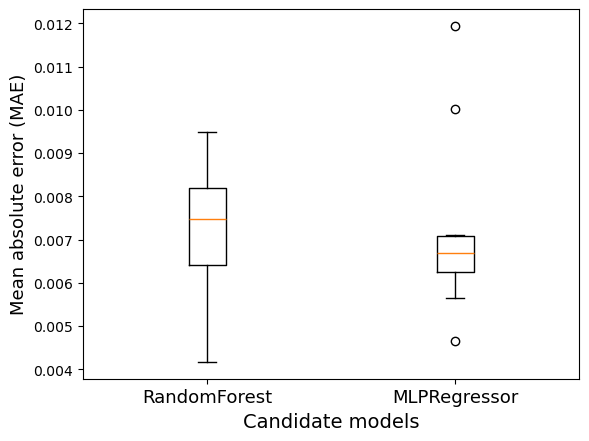

Evaluation metric:  neg_root_mean_squared_error
Model  RandomForest
Model  MLPRegressor
[('RandomForest', -0.02747375629367698, 0.007436150484698902), ('MLPRegressor', -0.01624990970048756, 0.00668075349620602)]


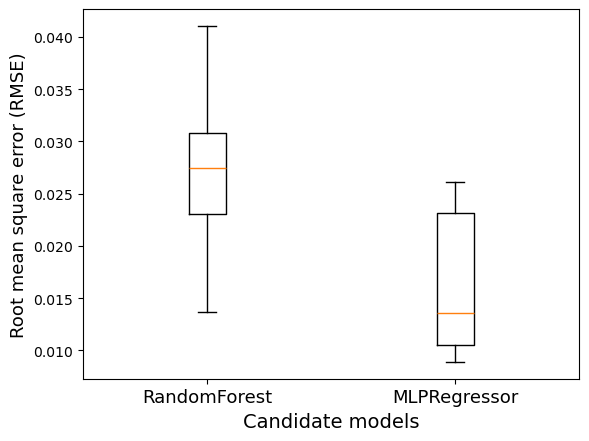

Evaluation metric:  r2
Model  RandomForest
Model  MLPRegressor
[('RandomForest', 0.8760634560315621, 0.06881087271553114), ('MLPRegressor', 0.956623864069587, 0.030535344617613713)]


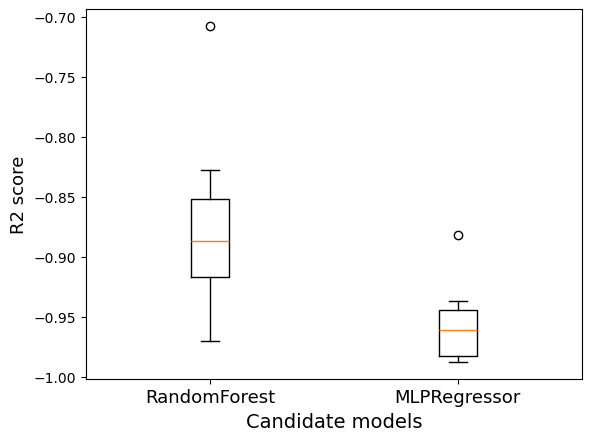

In [152]:
models = [('RandomForest', best_rf), ('MLPRegressor', best_mlp)]
error_metrics = [('neg_mean_absolute_error', 'Mean absolute error (MAE)'), ('neg_root_mean_squared_error', 'Root mean square error (RMSE)'), ('r2', 'R2 score')]
num_folds = 10

for scoring, i in error_metrics:
    results = []  # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('Evaluation metric: ', scoring)
    for name, model in models:
        print('Model ', name)
        cv_results = cross_val_score(model, X_train_sc, y_train_scaled, cv=my_cv, scoring=scoring, n_jobs=-1)
        results.append(-cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Compare results between algorithms
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models', fontsize=14)
    ax.set_ylabel('%s' % i, fontsize=13)
    plt.boxplot(results)
    ax.set_xticklabels(names, fontsize=13)
    plt.savefig(f'{scoring}_Comparison')
    plt.show()

    results = []

# 4. Results

This part contains:

- The evaluation on test fold
- Different plots
- Surface plots of the surrogate model
- Surface plots by going out of the range of definition of the regression

In [27]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# 6. Final evaluation on the test set RF
final_model_rf = best_rf  

start_time = time.time()

test_pred_RF = final_model_rf.predict(X_test_sc)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

test_r2 = r2_score(y_test_scaled, test_pred_RF)
test_rmse = root_mean_squared_error(y_test_scaled, test_pred_RF)
test_mae = mean_absolute_error(y_test_scaled, test_pred_RF)
print(f'Final model test root_mean_squared_error : {test_rmse}')
print(f'Final model test r2 score : {test_r2}')
print(f'Final model test mean_absolute_error : {test_mae}')

Temps d'exécution : 0.0269 secondes
Final model test root_mean_squared_error : 0.034136570843056574
Final model test r2 score : 0.9117206925416712
Final model test mean_absolute_error : 0.008816750954594296


In [26]:
# 6. Final evaluation on the test set MLP
final_model_mlp = best_mlp  

start_time = time.time()

test_pred_MLP = final_model_mlp.predict(X_test_sc)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Temps d'exécution : {elapsed_time:.4f} secondes")

test_r2 = r2_score(y_test_scaled, test_pred_MLP)
test_rmse = root_mean_squared_error(y_test_scaled, test_pred_MLP)
test_mae = mean_absolute_error(y_test_scaled, test_pred_MLP)
print(f'Final model test root_mean_squared_error : {test_rmse}')
print(f'Final model test r2 score : {test_r2}')
print(f'Final model test mean_absolute_error : {test_mae}')

Temps d'exécution : 0.0941 secondes
Final model test root_mean_squared_error : 0.016009464048084666
Final model test r2 score : 0.9805834207705179
Final model test mean_absolute_error : 0.006512900907049714


<function matplotlib.pyplot.show(close=None, block=None)>

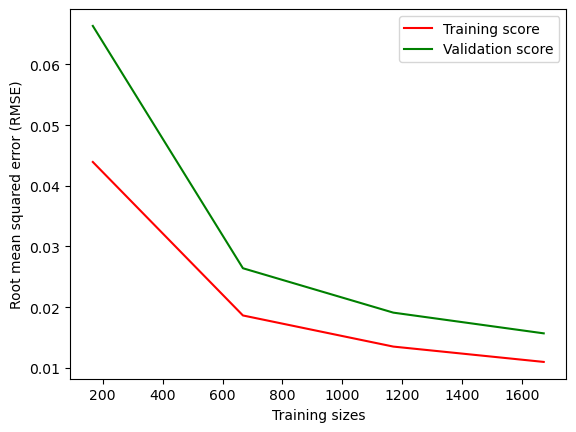

In [170]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, val_scores = learning_curve(best_mlp, X_train_sc, y_train_scaled, cv=my_cv, scoring= 'neg_root_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 4))


train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = -np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = -np.std(val_scores, axis=1)


plt.figure()
plt.xlabel( 'Training sizes')
plt.ylabel( 'Root mean squared error (RMSE)' )
plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, color="g", label="Validation score")

plt.legend(loc="best")
plt.show

In [154]:

y_predict_curtail_rf_test_rescaled = scaler_y.inverse_transform(test_pred_RF.reshape(-1, 1)).ravel()
y_predict_curtail_MLP_test_rescaled = scaler_y.inverse_transform(test_pred_MLP.reshape(-1, 1)).ravel()
y_test_rescaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

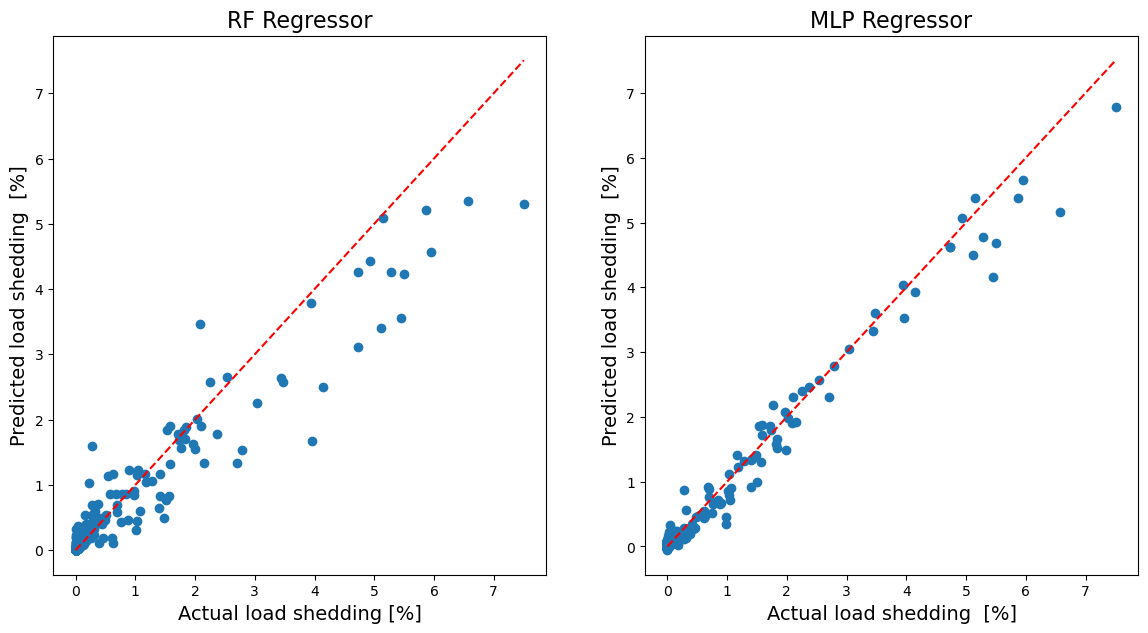

In [155]:

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test_rescaled, y_predict_curtail_rf_test_rescaled)
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], '--r')
plt.xlabel('Actual load shedding [%]', fontsize=14)
plt.ylabel('Predicted load shedding  [%]', fontsize=14)
plt.title('RF Regressor', fontsize=16)

plt.subplot(1, 2, 2)
plt.scatter(y_test_rescaled, y_predict_curtail_MLP_test_rescaled)
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], '--r')
plt.xlabel('Actual load shedding  [%]', fontsize=14)
plt.ylabel('Predicted load shedding  [%]' , fontsize=14)
plt.title('MLP Regressor', fontsize=16)

plt.show()

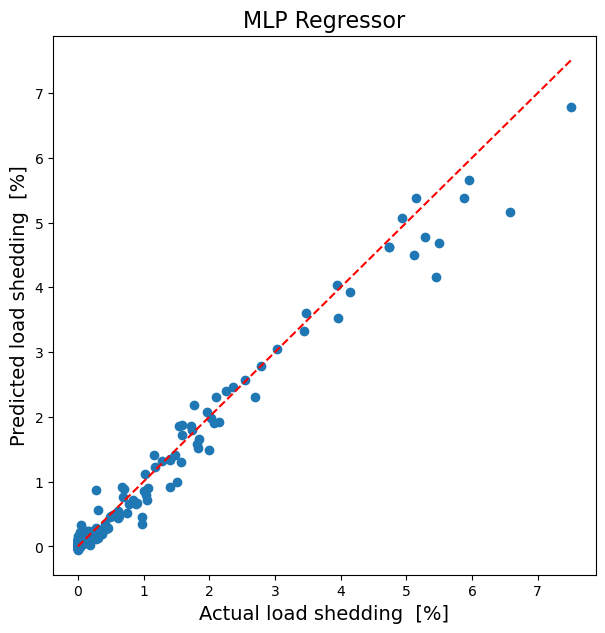

In [156]:

plt.figure(figsize=(7, 7))

plt.scatter(y_test_rescaled, y_predict_curtail_MLP_test_rescaled)
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], '--r')
plt.xlabel('Actual load shedding  [%]', fontsize=14)
plt.ylabel('Predicted load shedding  [%]' , fontsize=14)
plt.title('MLP Regressor', fontsize=16)

plt.show()

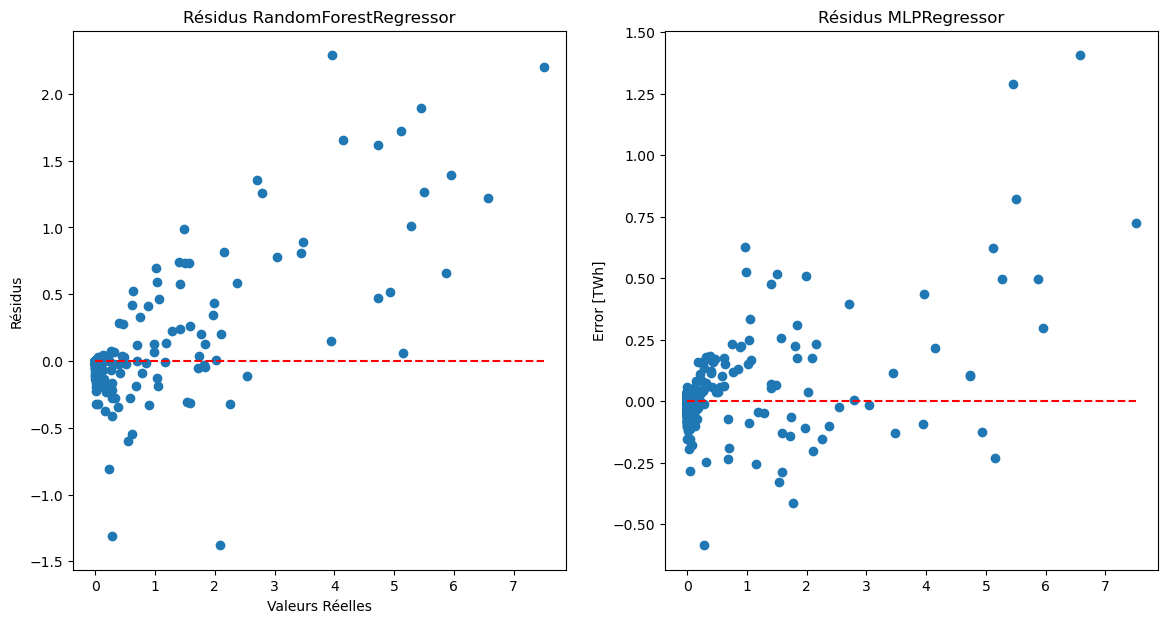

In [157]:
# Plotting the residuals
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
residuals_rf = y_test_rescaled - y_predict_curtail_rf_test_rescaled
plt.scatter(y_test_rescaled, residuals_rf)
plt.hlines(y=0, xmin=min(y_test_rescaled), xmax=max(y_test_rescaled), colors='r', linestyles='--')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Résidus')
plt.title('Résidus RandomForestRegressor')

plt.subplot(1, 2, 2)
residuals_mlp = y_test_rescaled - y_predict_curtail_MLP_test_rescaled
plt.scatter(y_test_rescaled, residuals_mlp)
plt.hlines(y=0, xmin=min(y_test_rescaled), xmax=max(y_test_rescaled), colors='r', linestyles='--')
plt.xlabel(' ')
plt.ylabel('Error [TWh]')
plt.title('Résidus MLPRegressor')

plt.show()

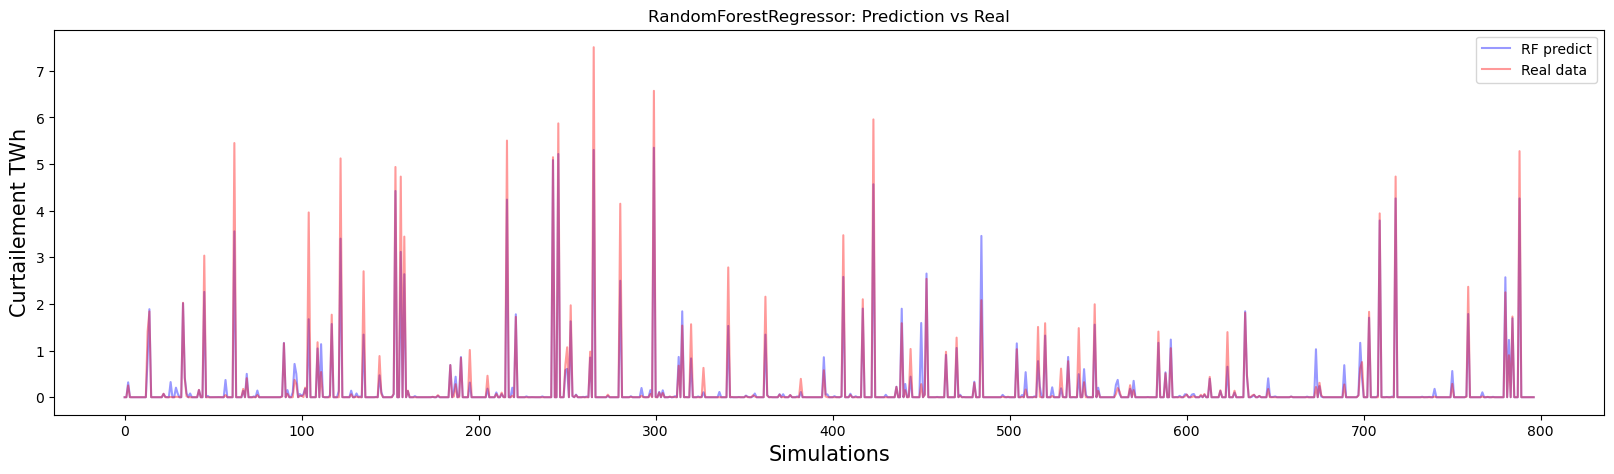

In [158]:
x = range(len(y_predict_curtail_rf_test_rescaled))
plt.figure(figsize=(20, 5))
plt.xlabel('Simulations', size=15)
plt.ylabel('Curtailement TWh', size=15)
plt.plot(x, y_predict_curtail_rf_test_rescaled, alpha=0.4, color='blue', label='RF predict')
plt.plot(x, y_test_rescaled, alpha=0.4, color='red', label='Real data')
plt.title('RandomForestRegressor: Prediction vs Real')
plt.legend()
plt.show()

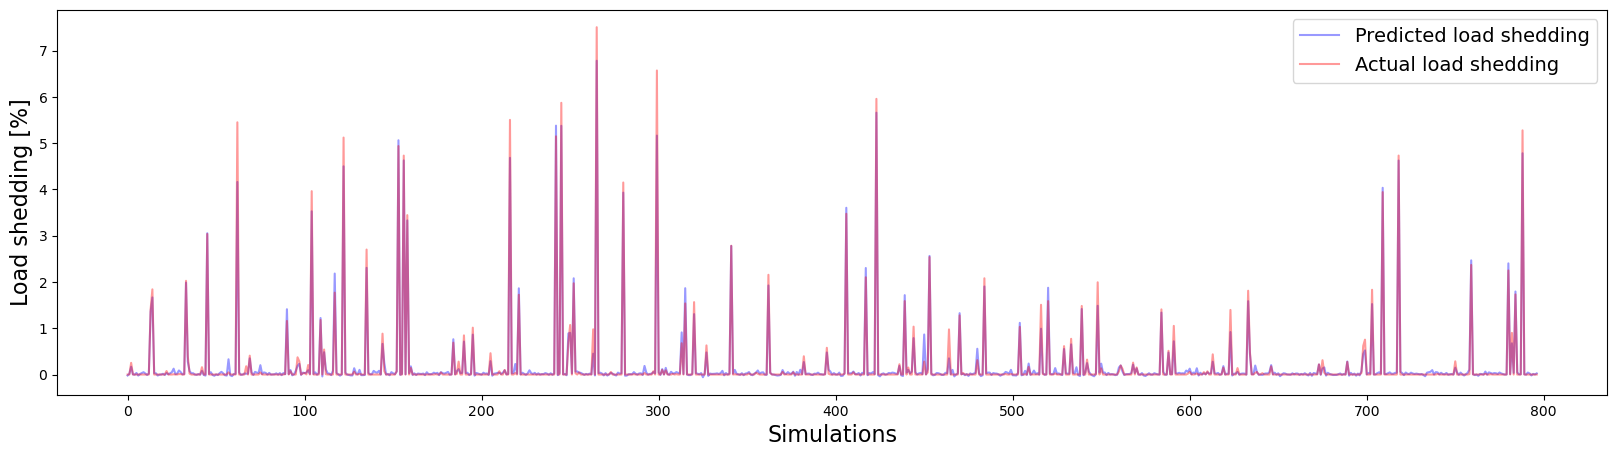

In [162]:
# Plot 
x = range(len(y_predict_curtail_MLP_test_rescaled))
plt.figure(figsize=(20, 5))
plt.xlabel('Simulations', fontsize=16)
plt.ylabel('Load shedding [%]', fontsize=16)
plt.plot(x, y_predict_curtail_MLP_test_rescaled, alpha=0.4, color='blue', label='Predicted load shedding')
plt.plot(x,  y_test_rescaled, alpha=0.4, color='red', label='Actual load shedding')
plt.legend(loc='upper right', fontsize=14)
plt.show()

### TEST ZONE

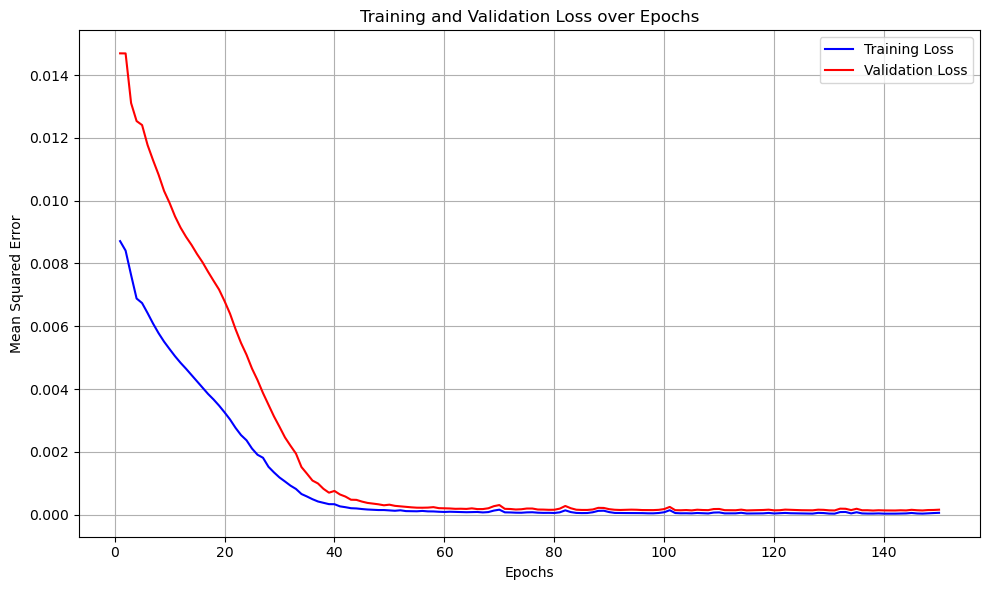

In [29]:
#TEST
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Définir le modèle MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16), activation='relu', solver='adam', alpha=0.001, learning_rate='adaptive')

# Nombre d'itérations (époques)
num_epochs = 150

# Listes pour stocker les résultats de la loss
train_loss_list = []
val_loss_list = []

# Entraîner le modèle pour plusieurs époques
for epoch in range(num_epochs):
    mlp.partial_fit(X_train_sc, y_train_scaled)  # Entraîner le modèle pour une seule époque
    #mlp11.fit(X_train_sc, y_train_scaled)  # Entraîner le modèle pour une seule époque
    # Calculer la loss sur l'ensemble d'entraînement
    y_train_pred = mlp.predict(X_train_sc)
    train_loss = mean_squared_error(y_train_scaled, y_train_pred)
    train_loss_list.append(train_loss)
    
    # Calculer la loss sur l'ensemble de test
    y_test_pred = mlp.predict(X_test_sc)
    test_loss = mean_squared_error(y_test_scaled, y_test_pred)
    val_loss_list.append(test_loss)

# Tracer la courbe de la loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_loss_list, linestyle='-', color='b', label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_list, linestyle='-', color='r', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Feature ranking:
1. Feature 'CR' (0.4859)
2. Feature 'rNTC' (0.3605)
3. Feature 'Share PV' (0.1226)
4. Feature 'Share Storage' (0.0145)
5. Feature 'Share Flex.' (0.0083)
6. Feature 'Share Wind' (0.0081)


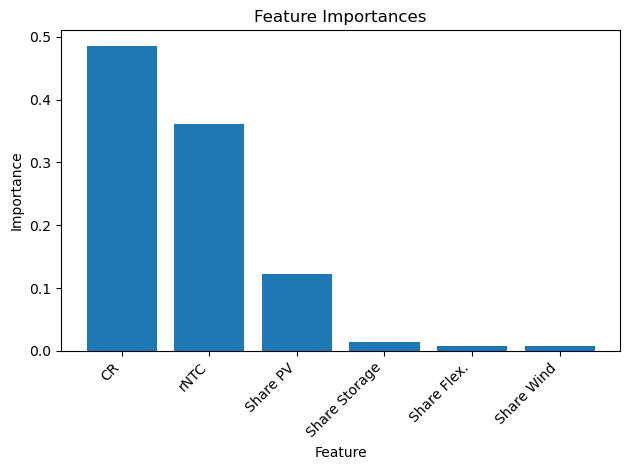

In [137]:
# Get feature importances
feature_names = ['CR', 'Share Flex.', 'Share Storage', 'Share Wind', 'Share PV', 'rNTC']
importances = best_rf.feature_importances_

# Sort the feature importances in descending order and get feature indices
indices = np.argsort(importances)[::-1]

# Print feature ranking with descriptive names
print("Feature ranking:")
for f in range(X_train_sc.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importances[indices[f]]:.4f})")

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train_sc.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_sc.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()  
plt.show()

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x1_values = np.linspace(0, 1, 15) 
x2_values = np.linspace(0, 1, 15)  
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)

x1 = np.linspace(0.3, 1.3, 15) 
x2 = np.linspace(0.25, 1.0, 15)  
x3 = np.linspace(0, 3.00, 15)  
x4 = np.linspace(0, 0.55, 15)  
x5 = np.linspace(0, 0.35, 15)  
x6 = np.linspace(0, 0.75, 15)  


valeurs_scaled = scaler_X.transform(np.array([1.16, 0.42, 0.001, 0.2, 0.05, 0.28]).reshape(1, -1))

static_values = np.full(225, 0.5) 
CR_static = np.full(225, valeurs_scaled[0, 0])
flex_static = np.full(225, valeurs_scaled[0, 1])
sto_static = np.full(225, valeurs_scaled[0, 2])
wind_static = np.full(225, valeurs_scaled[0, 3])
PV_static = np.full(225, valeurs_scaled[0, 4])
NTC_static = np.full(225, valeurs_scaled[0, 5])


print(valeurs_scaled)


[[ 8.44469439e-01  2.61114562e-01 -8.96200775e-05  3.63295417e-01
   1.42290882e-01  3.73147009e-01]]


C:\Users\romai\anaconda3\envs\pypsa-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


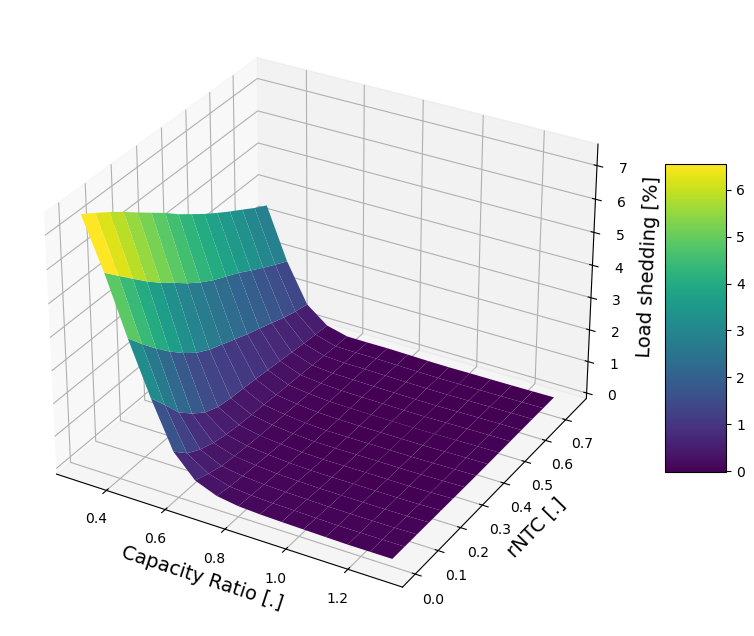

In [165]:
# CR-rNTC 
input_data = np.column_stack((x1_mesh.flatten(), flex_static, sto_static, wind_static, PV_static , x2_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x1, x6)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Capacity Ratio [.]', fontsize=14)
ax1.set_ylabel('rNTC [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

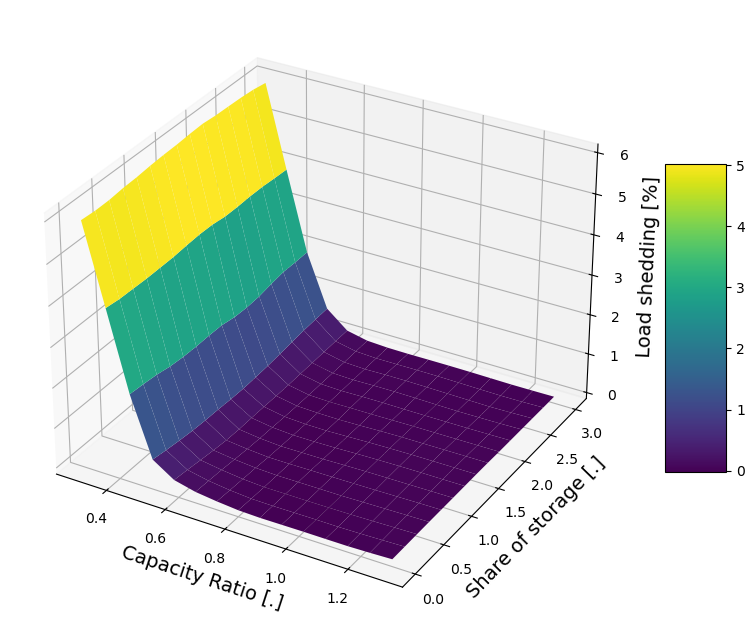

In [166]:
# CR-storage 
input_data = np.column_stack((x1_mesh.flatten(), flex_static, x2_mesh.flatten(), wind_static, PV_static , NTC_static))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x1, x3)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Capacity Ratio [.]', fontsize=14)
ax1.set_ylabel('Share of storage [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

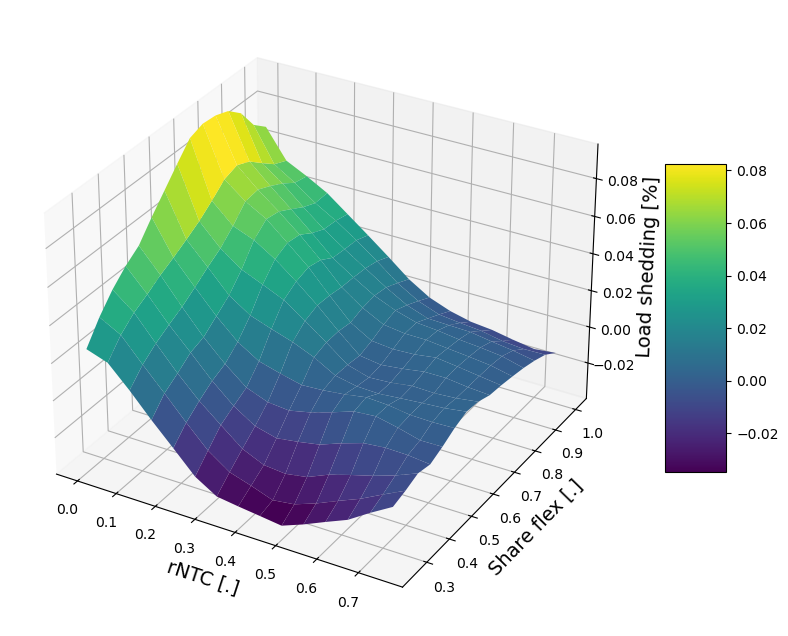

In [167]:
# rNTC-flex
input_data = np.column_stack((CR_static, x2_mesh.flatten(), sto_static, wind_static, PV_static , x1_mesh.flatten()))

predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)

A, B = np.meshgrid(x6, x2)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('rNTC [.]', fontsize=14)
ax1.set_ylabel('Share flex [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()

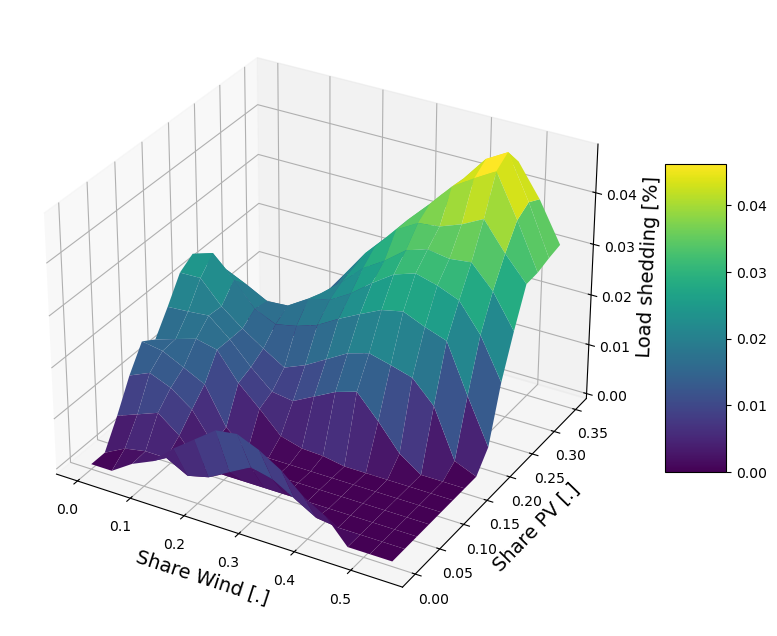

In [168]:
# Wind-PV
input_data = np.column_stack((CR_static, flex_static, sto_static, x1_mesh.flatten(), x2_mesh.flatten(), NTC_static))


predictions = best_mlp.predict(input_data)
predictions_mesh = predictions.reshape(x1_mesh.shape)


predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(x1_mesh.shape)
predictions_original = np.where(predictions_original < 0, 0, predictions_original)

fig = plt.figure(figsize=(10, 8))

A, B = np.meshgrid(x4, x5)

ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(A, B, predictions_original, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Share Wind [.]', fontsize=14)
ax1.set_ylabel('Share PV [.]',fontsize=14)
ax1.set_zlabel('Load shedding [%]',fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)


plt.show()